# Customer analysis

In this exercise, you work for a consulting firm as data analyst. One of your clients asked for help to understand its customer buying behavior. 

You dispose of a dataset from its e-commerce website with 13 features : 

- order_id : ID if the order
- order_status : Status of the order
- order_purchase_timestamp : Timestamp of the purchase
- order_delivered_customer_date : Timestamp of the delivery to the customer
- payment_type : Method of payment
- payment_installments : Number of payments for this purchase (does NOT affect the payment value)
- payment_value : Total amount of the payment
- review_score : Score given by the client, ranges from 1 to 5
- customer_unique_id : ID of the customer who purchased
- customer_zip_code_prefix : Zip code of the customer
- customer_city : City of the customer
- customer_state : State of the customer
- product_category_name_english : Name of the product category in English

With this data, you have to analyze customer behavior with two techniques:

- Customer segmentation with RFM
- Cohort analysis from Sept 2016 to October 2018.

At the end, you have to present your analysis with actionable insights to improve the customer relationship of your client. 

# Understanding RFM Segmentation 

❓ What are the 3 metrics used in an RFM Segmentation? (hint : What does RFM stand for?) 

<div class="alert alert-info">
RFM is a method that helps you analyze and understand your customers based on their score on each of these three factors: 
Recency, Frequency, and Monetary Value
</div>

❓ Can you summarize what each metric measures in one sentence?

<div class="alert alert-info">
Recency : how recently<br>
Frequency: with what frequency<br>
Monetary Value: what value did they buy<br>
</div>

❓ What data / or type of data do you need for each metric ? 

<div class="alert alert-info">
Recency: customer_unique_id / order_purchase_timestamp <br>
Frequency: customer_unique_id / order_id / order_purchase_timestamp <br>
Monetary Value: customer_unique_id / payment_value / order_purchase_timestamp <br>
</div>

Let's explore the dataset!

# Exploratory Data Analysis

## Import

Load the dataset and start an Exploratory Data Analysis

In [464]:
# Libraries
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from operator import attrgetter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import warnings
warnings.filterwarnings('ignore')

In [465]:
df = pd.read_csv('../data/db_customers.csv')

In [466]:
df

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105378,105378,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,credit_card,3.0,85.08,5,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,health_beauty
105379,105379,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,credit_card,3.0,195.00,4,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,baby
105380,105380,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,credit_card,5.0,271.01,5,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,home_appliances_2
105381,105381,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,credit_card,4.0,441.16,2,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,computers_accessories


❓ Which features should be formated in datetime ? 
Convert them

In [467]:
df[['order_purchase_timestamp', 'order_delivered_customer_date']] = df[['order_purchase_timestamp', 'order_delivered_customer_date']].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105383 entries, 0 to 105382
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Unnamed: 0                     105383 non-null  int64         
 1   order_id                       105383 non-null  object        
 2   customer_id                    105383 non-null  object        
 3   order_status                   105383 non-null  object        
 4   order_purchase_timestamp       105383 non-null  datetime64[ns]
 5   order_delivered_customer_date  102224 non-null  datetime64[ns]
 6   payment_type                   105382 non-null  object        
 7   payment_installments           105382 non-null  float64       
 8   payment_value                  105382 non-null  float64       
 9   review_score                   105383 non-null  int64         
 10  customer_unique_id             105383 non-null  object        
 11  

In [1]:
df

NameError: name 'df' is not defined

In [469]:
CA = df['payment_value'].sum()
CA

16293876.33

In [470]:
clients = df['customer_unique_id'].drop_duplicates().T

# clients = df['customer_unique_id'].count()
clients.value_counts().sum()

96096

In [540]:
df['review_score'].agg(np.mean)

4.106619602533726

In [531]:
import plotly.express as px

fig = px.histogram(df, x="review_score",
                   title='Review score',
                   labels={'review_score':'review_score'}, # can specify one label per df column
                   opacity=0.8,
#                    log_y=True, # represent bars with log scale
                   color="review_score"
                   )
fig.show()

In [472]:
df["review_score"].value_counts(ascending=True).value_counts(ascending=True)

3505     1
8756     1
12719    1
20173    1
60230    1
Name: review_score, dtype: int64

In [ ]:
clients.value_counts()

In [532]:
etats = df["customer_state"].drop_duplicates().T

In [534]:
etats.value_counts().sum()

27

In [535]:
villes = df["customer_city"].drop_duplicates().T

In [536]:
villes.value_counts().sum()

4097

In [541]:
produits = df["order_id"].value_counts().sum()

In [542]:
produits

103405

In [544]:
name_produits = df['product_category_name_english']

In [547]:
name_produits.value_counts().head(10)

bed_bath_table           10110
health_beauty             9085
sports_leisure            7955
computers_accessories     6889
furniture_decor           6777
housewares                6186
watches_gifts             5781
telephony                 4316
auto                      4001
toys                      3986
Name: product_category_name_english, dtype: int64

In [556]:
name_produits_pourcentage = df['product_category_name_english'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
name_produits_pourcentage.head(10)

bed_bath_table           9.92%
health_beauty            8.92%
sports_leisure           7.81%
computers_accessories    6.76%
furniture_decor          6.65%
housewares               6.07%
watches_gifts            5.68%
telephony                4.24%
auto                     3.93%
toys                     3.91%
Name: product_category_name_english, dtype: object

In [548]:
paiement = df['payment_type']

In [550]:
paiement.value_counts().head(10)

credit_card    76477
boleto         19677
voucher         5725
debit_card      1525
Name: payment_type, dtype: int64

In [557]:
paiements_pourcentage = df['payment_type'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
paiements_pourcentage

credit_card    73.96%
boleto         19.03%
voucher         5.54%
debit_card      1.47%
Name: payment_type, dtype: object

❓ Which features are Categorical ? List the unique values on these features.

<div class="alert alert-info">
These features are categorical: [order_status] | [payment_type] | [customer_city] | [customer_state] | [product_category_name_english]
</div>

In [473]:

# Storing unique values for categorical features into variables
order_status=df['order_status'].unique()
payment_type=df['payment_type'].unique()
customer_city=df['customer_city'].unique()
customer_state=df['customer_state'].unique()
product_category_name_english=df['product_category_name_english'].unique()

# Printing unique values for each categorical columns
print(f'order status: {order_status}')
print(f'payment_type: {payment_type}')
print(f'order status: {customer_city}')
print(f'order status: {customer_state}')
print(f'order status: {product_category_name_english}')

order status: ['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']
payment_type: ['credit_card' 'voucher' 'boleto' 'debit_card' 'not_defined' nan]
order status: ['sao paulo' 'barreiras' 'vianopolis' ... 'messias targino'
 'campo do tenente' 'nova vicosa']
order status: ['SP' 'BA' 'GO' 'RN' 'PR' 'RS' 'RJ' 'MG' 'SC' 'RR' 'PE' 'TO' 'CE' 'DF'
 'SE' 'MT' 'PB' 'PA' 'RO' 'ES' 'AP' 'MS' 'MA' 'PI' 'AL' 'AC' 'AM']
order status: ['housewares' 'perfumery' 'auto' 'pet_shop' 'stationery' nan
 'furniture_decor' 'office_furniture' 'garden_tools'
 'computers_accessories' 'bed_bath_table' 'toys'
 'construction_tools_construction' 'telephony' 'health_beauty'
 'electronics' 'baby' 'cool_stuff' 'watches_gifts' 'air_conditioning'
 'sports_leisure' 'books_general_interest' 'small_appliances' 'food'
 'luggage_accessories' 'fashion_underwear_beach' 'christmas_supplies'
 'fashion_bags_accessories' 'musical_instruments'
 'construction_tools_lights' 'books_technical' 'cos

❓ Check for missing values. What do you notice ? 


In [474]:
# Checking for missing values
df.isnull().sum()

Unnamed: 0                          0
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    3159
payment_type                        1
payment_installments                1
payment_value                       1
review_score                        0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_category_name_english    2410
dtype: int64

<div class="alert alert-info">
We can see missing values in 5 features:<br>
1) payment_type, payement_installments, payment_value (1 missing value in each)<br>
2) order_delivered_customer_date (3159)<br>
3) product_category_name_english(2410)<br>
</div>

❓ Can you find an explanation for the missing `order_delivered_customer_date` ? 
(hint : Check for non delivered orders)

In [475]:
# Checking if missing order_delivered_customer_date count is equal to all purchases which are not yet delivered
df[df['order_status'] != "delivered"].shape

(3158, 15)

<div class="alert alert-info">
We have 3158 missing values for order_delivered_customer_date. It's because these purchases are not delivered yet. There is a difference of 1, and I think it's because of the missing value in the 3 other features (payment_type,installments,value).
</div>

❓ What are the proportions of each `order_status` ? 

In [476]:
# Calculate ratio of each order status in our dataframe.
df['order_status'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

delivered      97.0%
shipped        1.12%
canceled       0.63%
unavailable    0.62%
invoiced       0.31%
processing      0.3%
created         0.0%
approved        0.0%
Name: order_status, dtype: object

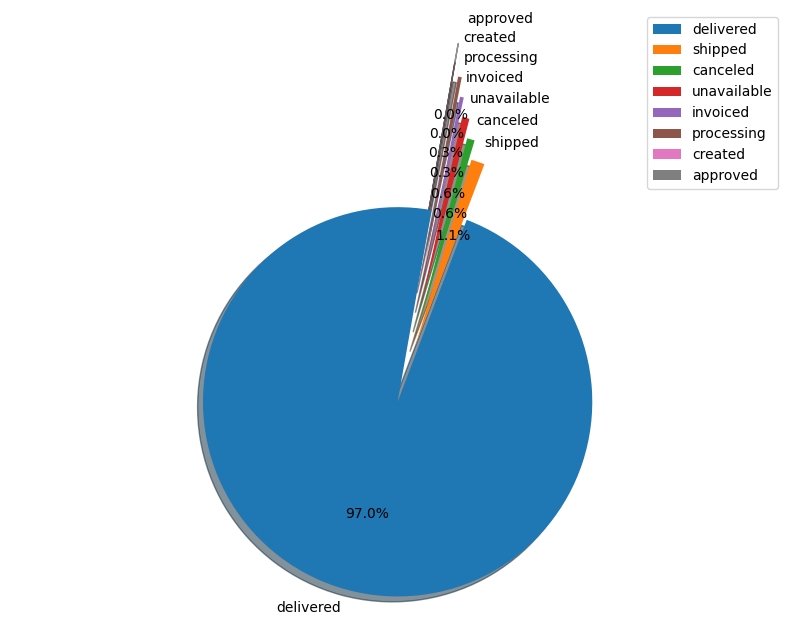

In [477]:
labels = 'delivered', 'shipped', 'canceled', 'unavailable','invoiced','processing','created','approved'
sizes = df['order_status'].value_counts()
explode = (0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8)

fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=80)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()

❓ Which `order_status` do you think should be removed from the analysis

<div class="alert alert-info">
I would removed all the order_status, except delivered and shipped status. These 2 orders represent 98% of the order_status, and we want to focus on this because it will be easier to segmentate our different customers.
</div>

In [478]:
df_new = df[(df['order_status'] != "delivered") & (df['order_status'] != "shipped")].index
df.drop(df_new , inplace=True)
df['order_status'].value_counts()

delivered    102225
shipped        1180
Name: order_status, dtype: int64

❓ What feature would you choose in the e-commerce dataset provided? 

<div class="alert alert-info">
Recency: customer_unique_id / order_purchase_timestamp <br>
Frequency: customer_unique_id / order_id / order_purchase_timestamp <br>
Monetary Value: customer_unique_id / payment_value / order_purchase_timestamp <br>
<br>
Features to keep : order_id / customer_unique_id  / order_purchase_timestamp / payment_value .
</div>

In [479]:
df_RFM = df[["customer_unique_id", "order_id", "order_purchase_timestamp", "payment_value" ]]
df_RFM.head()

,customer_unique_id,order_id,order_purchase_timestamp,payment_value
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,18.12
1,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2.00
2,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,18.59
3,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,141.46
4,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,179.12


❓ What method would you use to group the data? 

<div class="alert alert-info">
I would use the method .groupby() from pandas library 
</div>

❓ What feature would you use to group the data? 

<div class="alert alert-info">
 I would use the customer_unique_id in order to group the data.
</div>

Group the data. (Hint: you can carry out the grouping one by one and then merge, or even better use the .agg method and get a robust grouping in one line of code)

In [480]:
df_freq_Monetary = df.groupby(['customer_unique_id']).agg(
    Frequency = pd.NamedAgg(column='payment_value', aggfunc='count'),
    Monetary = pd.NamedAgg(column='payment_value', aggfunc=sum)
).reset_index()

df_freq_Monetary.head()

,customer_unique_id,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19
2,0000f46a3911fa3c0805444483337064,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,1,196.89


What type of data is the R supposed to be? Is it in the right format? (Hint : investigate the difference between `datetime` and `timedelta`) 

<div class="alert alert-info">
The answer is Timedelta because : <br>
datetime – combines date and time information. <br>
timedelta – represents the difference between two dates or times. <br>
</div>

So there is one more step to carry out before the data is ready : Calculate the recency base on the date of the purchase

❓ What is the date of the least purchase?

In [481]:
date_less_recent = df['order_purchase_timestamp'].min()
date_less_recent

Timestamp('2016-09-04 21:15:19')

❓What is the date of the most recent purchase?

In [482]:
date_most_recent = df['order_purchase_timestamp'].max()
date_most_recent 

Timestamp('2018-09-03 09:06:57')

❓How would you calculate the recency? (hint: what date would you use to compare with the purchase date? Today? probably not...)

Create a feature calculating the difference between `the most recent purchased + 1 day`, and `order_purchase_timestamp`.

In [483]:
recens_date = df['order_purchase_timestamp'].max() + timedelta(days=1)

In [484]:
df_date_test = df[["customer_unique_id", "order_id", "order_purchase_timestamp", "payment_value" ]]
df_date_test.head()

,customer_unique_id,order_id,order_purchase_timestamp,payment_value
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,18.12
1,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2.00
2,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,18.59
3,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,141.46
4,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,179.12


In [485]:
df_date_test = df_date_test.groupby('customer_unique_id')[["order_purchase_timestamp"]].max() 
df_date_test['Recency'] = df_date_test.order_purchase_timestamp.apply(lambda x : (recens_date - x).days)
df_date_test['Recency'].head()

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    116
0000b849f77a49e4a4ce2b2a4ca5be3f    119
0000f46a3911fa3c0805444483337064    542
0000f6ccb0745a6a4b88665a16c9f078    326
0004aac84e0df4da2b147fca70cf8255    293
Name: Recency, dtype: int64

In [486]:
# recence
df['order_purchase_timestamp'] = df['order_purchase_timestamp'].apply(pd.to_datetime)
date_format = "%m/%d/%Y"
a = df['order_purchase_timestamp']
b = max(df['order_purchase_timestamp']) + timedelta(days=1)
df['Recency'] = b-a
df['Recency'] = df['Recency'].astype('timedelta64[D]')
recence = df.groupby('customer_unique_id')['Recency'].min().astype(int)
# recence = int(recence['Recency'])
recence = pd.DataFrame(recence).reset_index()
recence.head()

,customer_unique_id,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,116
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119
2,0000f46a3911fa3c0805444483337064,542
3,0000f6ccb0745a6a4b88665a16c9f078,326
4,0004aac84e0df4da2b147fca70cf8255,293


In [487]:
df_rfm = recence.merge(df_freq_Monetary, left_on='customer_unique_id',right_on = 'customer_unique_id',how ='left')

Now that you have created a new dataset with the right columns, explore it to understand what you created.

In [488]:
df_rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19
2,0000f46a3911fa3c0805444483337064,542,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89


❓Which column is the R? The F? The M?

<div class="alert alert-info">
R : Recency <br>
F : Frequency <br>
M : Monetary <br>
</div>

Now for each metric independantly, build clutsers (Hint 1: you can use `.describe()` to have insights about each metrics. Hint 2: Don't choose more than 3 clusters)

In [489]:
df_rfm.describe()

,Recency,Frequency,Monetary
count,94399.000000,94399.000000,94399.000000
mean,242.864162,1.095393,168.250134
std,152.723176,0.530316,232.880460
min,1.000000,0.000000,0.000000
25%,119.000000,1.000000,63.110000
50%,224.000000,1.000000,108.100000
75%,352.000000,1.000000,184.590000
max,729.000000,54.000000,13664.080000


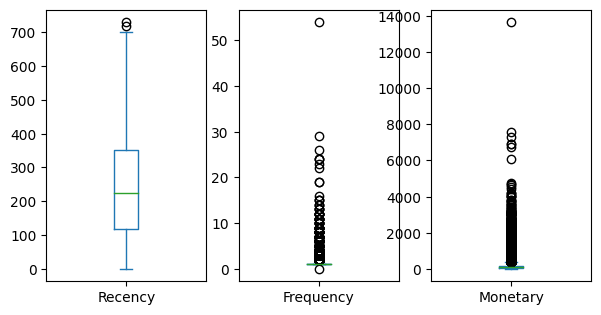

In [490]:
#individuel plot
df_rfm.plot(kind='box', subplots=True, layout=(3, 5), figsize=(12, 12));

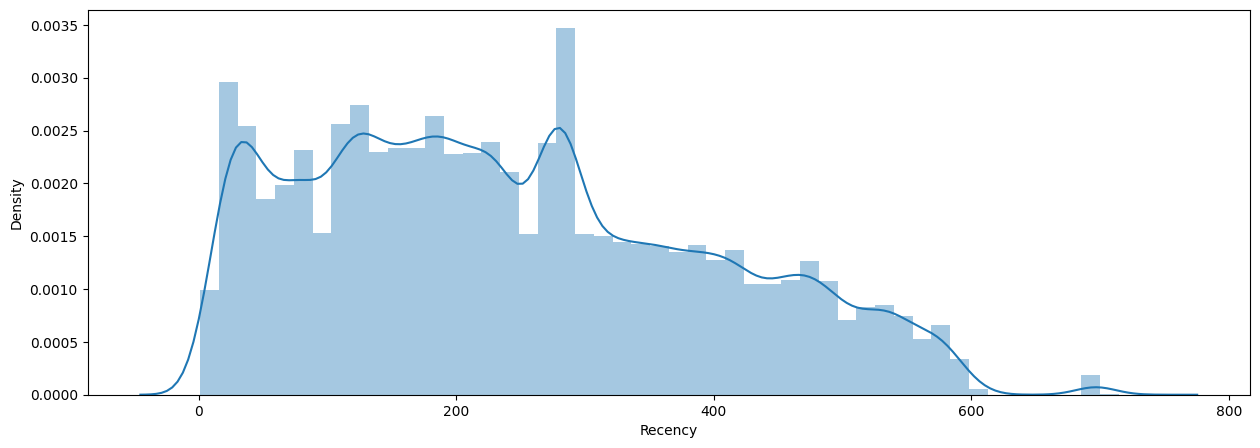

In [491]:
ax = sns.distplot(df_rfm['Recency'])

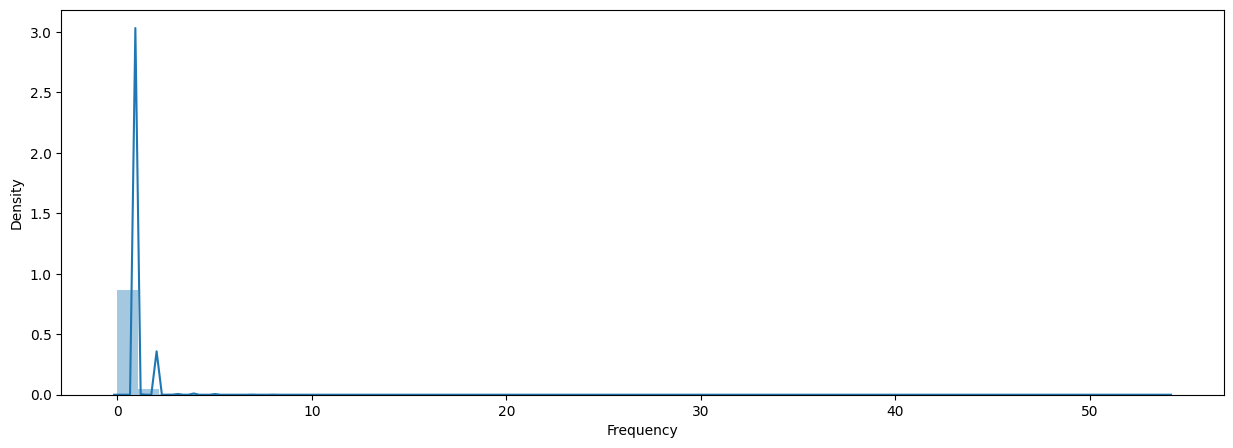

In [492]:
ax = sns.distplot(df_rfm['Frequency'])

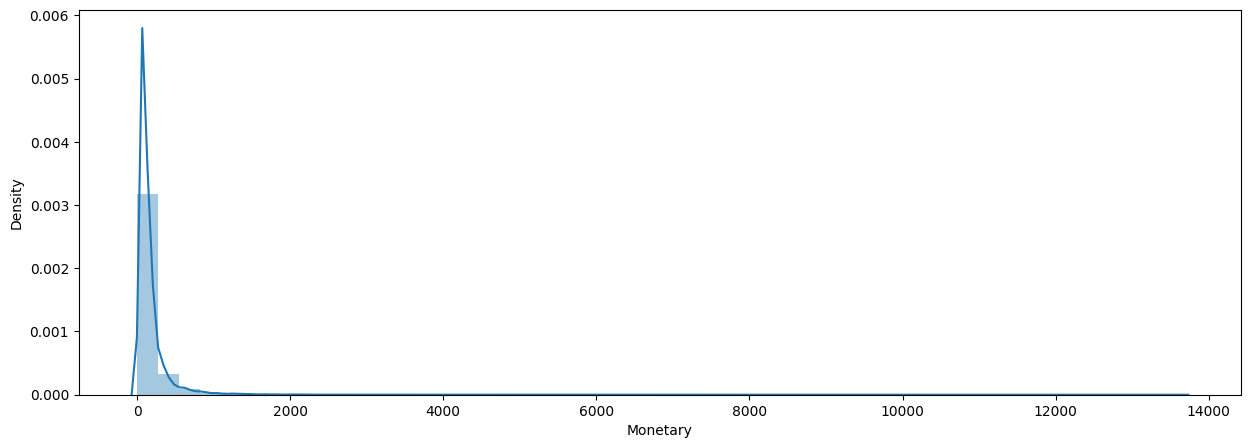

In [493]:
ax = sns.distplot(df_rfm['Monetary'])

In [494]:
df_rfm

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19
2,0000f46a3911fa3c0805444483337064,542,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89
...,...,...,...,...
94394,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,2067.42
94395,fffea47cd6d3cc0a88bd621562a9d061,267,1,84.58
94396,ffff371b4d645b6ecea244b27531430a,573,1,112.46
94397,ffff5962728ec6157033ef9805bacc48,124,1,133.69


In [495]:
df_rfm['R'] = pd.qcut(df_rfm['Recency'], q=3, labels=[ 3, 2, 1])

In [496]:
df_rfm.groupby('R').agg(
    count=('customer_unique_id', 'count'),
    min_recency=('Recency', min),
    max_recency=('Recency', max),
    std_recency=('Recency', 'std'),    
    avg_recency=('Recency', 'mean')
).sort_values(by='avg_recency')

,count,min_recency,max_recency,std_recency,avg_recency
R,,,,,
3,31730,1,154,43.636880,81.280397
2,31356,155,295,41.744815,225.805587
1,31313,296,729,84.837366,423.681762


<div class="alert alert-info">
Those with a score of 3 are very recent, last seen between 1 and 154 days ago, while those with a score of 1 were last seen between 296 and 729 days ago.
</div>

In [497]:
#  df_rfm['Frequency'].value_counts()

In [498]:
# df_rfm['F'] = pd.qcut(df_rfm['Frequency'].rank(method='first'), q=2, labels=[1, 2])
df_rfm["F"] = [2 if x > 1  else 1 for x in df_rfm['Frequency']]

In [499]:
df_rfm.groupby('F').agg(
    count=('customer_unique_id', 'count'),
    min_frequency=('Frequency', min),
    max_frequency=('Frequency', max),
    std_frequency=('Frequency', 'std'),
    avg_frequency=('Frequency', 'mean')
).sort_values(by='avg_frequency')

,count,min_frequency,max_frequency,std_frequency,avg_frequency
F,,,,,
1,88115,0,1,0.003369,0.999989
2,6284,2,54,1.519093,2.433164


<div class="alert alert-info">
Creating frequency scores is more difficult because the typical distribution of order volumes has a high number of unique orders. I choose to make a function in only 2 scores so as not to add too many clusters, simply to separate single commands from more frequent commands
</div>

In [500]:
df_rfm['M'] = pd.qcut(df_rfm['Monetary'], q=3, labels=[1, 2, 3])

In [501]:
df_rfm.groupby('M').agg(
    count=('customer_unique_id', 'count'),
    min_monetary=('Monetary', min),
    max_monetary=('Monetary', max),
    std_monetary=('Monetary', 'std'),
    avg_monetary=('Monetary', 'mean')
).sort_values(by='avg_monetary')

,count,min_monetary,max_monetary,std_monetary,avg_monetary
M,,,,,
1,31467,0.00,75.28,15.004001,49.983472
2,31472,75.29,153.01,22.103369,110.166847
3,31460,153.02,13664.08,336.955783,344.648552


<div class="alert alert-info">
While money scores from 1 to 2 show small standard deviations, the standard deviation in segment 3 is so large that it makes the segment almost unusable by marketers. <br>
Although the segments were created in the recommended way, it shows that sometimes we need to use a different approach.
</div>

In [502]:
df_rfm['RFM'] = df_rfm['R'].astype(str) +\
                df_rfm['F'].astype(str) +\
                df_rfm['M'].astype(str)

<div class="alert alert-info">
one can concatenate the R, F, and M values in a single column to create the RFM score for each customer. We see the raw recency, frequency and monetary values of each customer next to their scores
</div>

In [503]:
df_rfm['RFM_score'] =   df_rfm['R'].astype(int) +\
                        df_rfm['F'].astype(int) +\
                        df_rfm['M'].astype(int)

<div class="alert alert-info">
One can also calculate additional aggregate metrics, such as the RFM score (recency + frequency + monetary) and use weights to give certain variables, such as recency more impact than monetary. I tend to find that individual values are used the most, as the rfm_score metric obviously hides some detail, however, it can be useful for quick sorting.
</div>

In [504]:
df_rfm['RFM_score'].value_counts()

5    29563
6    21437
4    20735
7    11210
3    10158
8     1296
Name: RFM_score, dtype: int64

In [505]:
df_rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,3,1,2,312,6
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,3,1,1,311,5
2,0000f46a3911fa3c0805444483337064,542,1,86.22,1,1,2,112,4
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,1,1,1,111,3
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89,2,1,3,213,6


<AxesSubplot:xlabel='RFM_score', ylabel='Recency'>

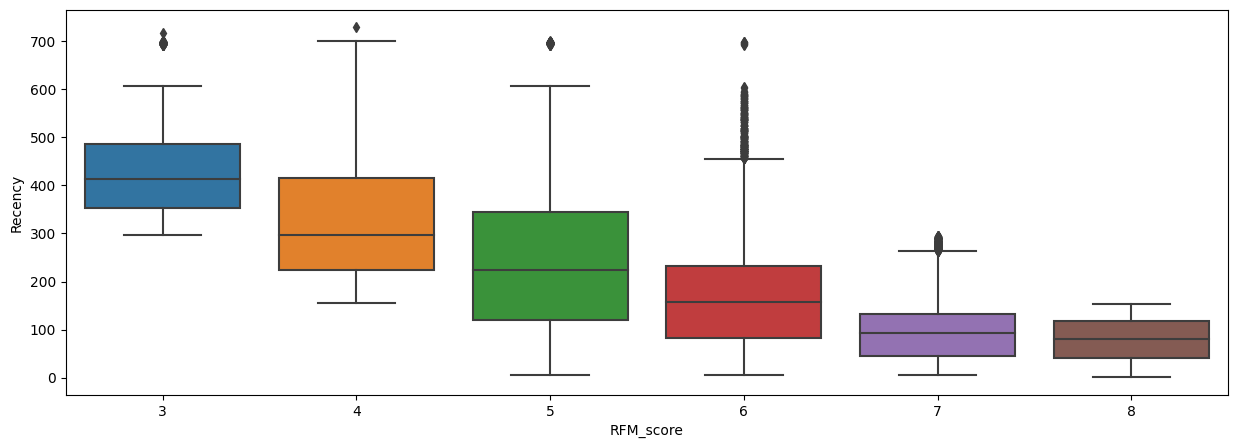

In [506]:
sns.boxplot(df_rfm.RFM_score, df_rfm.Recency)

<AxesSubplot:xlabel='RFM_score', ylabel='Frequency'>

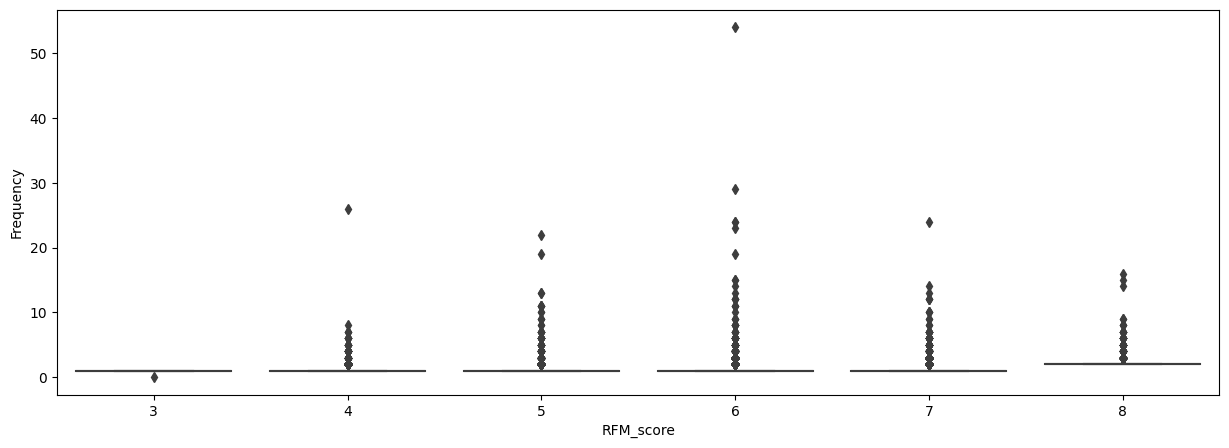

In [507]:
sns.boxplot(df_rfm.RFM_score, df_rfm.Frequency)

<AxesSubplot:xlabel='RFM_score', ylabel='Monetary'>

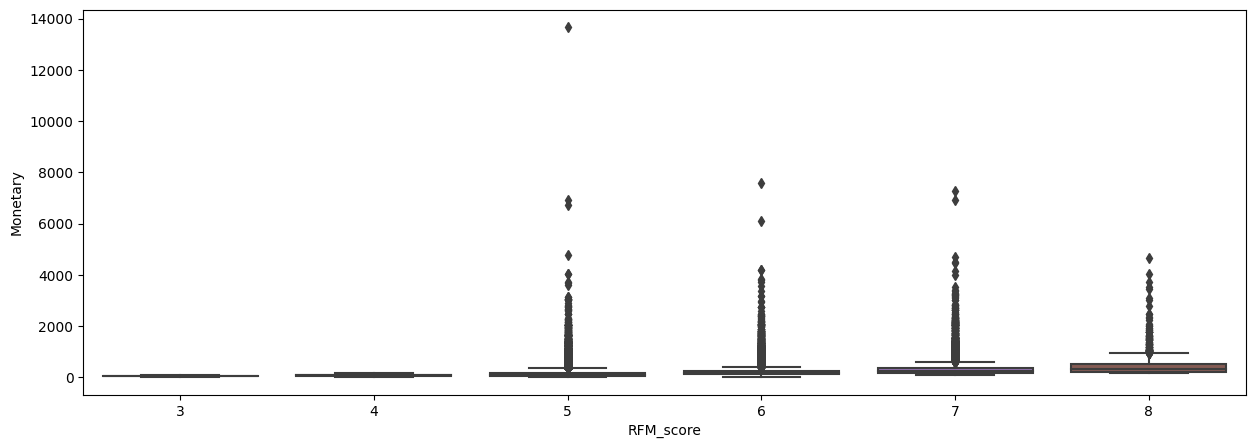

In [508]:
sns.boxplot(df_rfm.RFM_score, df_rfm.Monetary)

In [509]:
df_rfm.groupby('RFM_score').agg(
    customers=('customer_unique_id', 'count'),
    mean_recency=('Recency', 'mean'),
    mean_frequency=('Frequency', 'mean'),
    mean_monetary=('Monetary', 'mean'),
).sort_values(by='RFM_score')

,customers,mean_recency,mean_frequency,mean_monetary
RFM_score,,,,
3,10158,424.802028,0.999902,50.239024
4,20735,325.847022,1.029081,78.492120
5,29563,241.194229,1.047154,161.430055
6,21437,164.515837,1.134720,215.277771
7,11210,97.665834,1.211329,336.175548
8,1296,79.145062,2.351852,454.466096


<div class="alert alert-info">
Looking at the average recency, average frequency and average money for each of the RFM scores from 3 to 8 gives a first picture of our customers. The lowest-rated customers with an rfm_score of 3 who are in rfm_segment111 have an average recency of 424 days, placed a single order, and spent an average of 50 $.<br>

Top customers in rfm_scoregroup 8 and rfm_segment 323 were viewed 79 days ago, placed an average of 2.3 orders, and spent 454 $. Marketers can clearly see who to target with reactivation campaigns and who to give preferential treatment to.
</div>


In [510]:
df_rfm["RFM"].value_counts(ascending=True)

321      309
221      352
121      420
222      484
322      496
122      591
123     1148
223     1188
323     1296
113     9003
213     9299
313     9526
212     9711
311     9906
112     9993
111    10158
312    10197
211    10322
Name: RFM, dtype: int64

In [511]:
df_rfm.groupby('RFM').agg(
    customers=('customer_unique_id', 'count'),
    mean_recency=('Recency', 'mean'),
    mean_frequency=('Frequency', 'mean'),
    mean_monetary=('Monetary', 'mean'),
).sort_values(by='RFM')

,customers,mean_recency,mean_frequency,mean_monetary
RFM,,,,
111,10158,424.802028,0.999902,50.239024
112,9993,425.086661,1.000000,109.080908
113,9003,422.146173,1.000000,347.139961
121,420,426.847619,2.435714,51.492524
122,591,425.109983,2.500846,111.850288
123,1148,411.689024,2.598432,422.063728
211,10322,225.660822,1.000000,49.976917
212,9711,227.099269,1.000000,110.392051
213,9299,224.864502,1.000000,315.334018


In [512]:
def categorie(x):
    if x in["111", "112"]:
        return "Lost"
    elif x in["221", "323"]:
         return "Fidèle"
    elif x in["123","223","213" "113"]:
        return "Premium"
    else:
        return "Lambda"

In [513]:
df_rfm['Categorie'] = df_rfm['RFM'].apply(categorie)

In [558]:
df_rfm

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM,RFM_score,Categorie
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,3,1,2,312,6,Lambda
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,3,1,1,311,5,Lambda
2,0000f46a3911fa3c0805444483337064,542,1,86.22,1,1,2,112,4,Lost
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,1,1,1,111,3,Lost
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89,2,1,3,213,6,Lambda
...,...,...,...,...,...,...,...,...,...,...
94394,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,2067.42,1,1,3,113,5,Lambda
94395,fffea47cd6d3cc0a88bd621562a9d061,267,1,84.58,2,1,2,212,5,Lambda
94396,ffff371b4d645b6ecea244b27531430a,573,1,112.46,1,1,2,112,4,Lost
94397,ffff5962728ec6157033ef9805bacc48,124,1,133.69,3,1,2,312,6,Lambda


In [515]:
# import squarify
# # visualisation squarify
# y = df_rfm['Categorie'].value_counts()
# plt.rcParams['figure.figsize'] = (15, 5)
# color = plt.cm.tab20c(np.linspace(0, 1, 15))
# squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
# plt.title('Your clients are', fontsize = 20)
# plt.axis('off')
# plt.show()

In [516]:
df_rfm['Categorie'].value_counts(ascending=True)

Fidèle      1648
Premium     2336
Lost       20151
Lambda     70264
Name: Categorie, dtype: int64

### Kmeans

In [517]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [518]:
df_clusters = df_rfm[['Recency']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(df_clusters)

KMeans(n_clusters=3)

In [519]:
KMeans(n_clusters=5)

KMeans(n_clusters=5)

In [520]:
df_clusters = df_clusters.assign(cluster=kmeans.labels_)
df_clusters.groupby('cluster')['Recency'].mean().sort_values(ascending=False).to_frame()

,Recency
cluster,
2,463.385113
0,260.493241
1,92.507011


Now that you have clusters for each category, explain the different buying behaviors

# Working with cohorts

❓What is a cohort? 

<div class="alert alert-info">
An analysis that allows you to see the customer loyalty rate over time
</div>

❓Why is it interesting to analyse cohorts ? 

<div class="alert alert-info">
This type of analysis is interesting because you can find different groups of customers who have the same pattern when using your site or brand. It allows you to ask more specific question, more targeted question and make inform product decision that will reduce the loss of customers and increase your revenue.
</div>

❓What data (already existing in the original dataset) do we need to build a cohort? 

<div class="alert alert-info">
We need these features: customer_unique_id, order_purchase_timestamp and order_id
</div>

Build a new df with just these 3 features

In [521]:
df_cohorts = df[["customer_unique_id", "order_id", "order_purchase_timestamp"]]
df_cohorts['order_purchase_timestamp'] = df_cohorts['order_purchase_timestamp'].apply(pd.to_datetime)
df_cohorts.head()

,customer_unique_id,order_id,order_purchase_timestamp
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33
1,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33
2,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33
3,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37
4,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49


Using the `pandas.Serie.dt.to_period()` methode, create a new feature converting `order_purchase_timestamp` in months

In [522]:
# df_cohorts["order_time_month"] = df_cohorts["order_purchase_timestamp"].dt.to_period("M")

In [523]:
df_cohorts.head()

,customer_unique_id,order_id,order_purchase_timestamp
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33
1,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33
2,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33
3,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37
4,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49


Create a new feature called `cohort` by grouping the previous df by `customer_unique_id`, and tranforming it's minimum value in months (with the same `pandas.Serie.dt.to_period()` as before)

In [524]:
df_c= df_cohorts.copy()

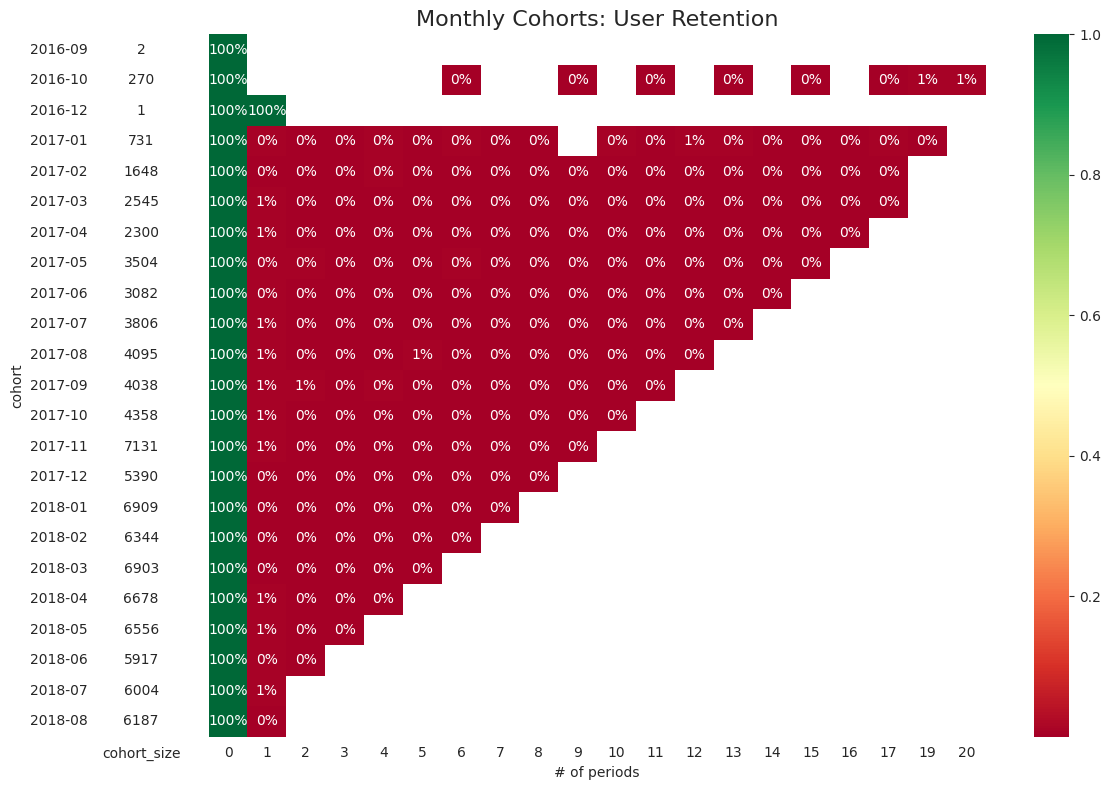

In [525]:
test2 = df_c[['customer_unique_id', 'order_id', 'order_purchase_timestamp']].drop_duplicates()

test2['order_month'] = test2['order_purchase_timestamp'].dt.to_period('M')
test2['cohort'] = test2.groupby('customer_unique_id')['order_purchase_timestamp'] \
                 .transform('min') \
                 .dt.to_period('M') 

df_cohort2 = test2.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('customer_unique_id', 'nunique')) \
              .reset_index(drop=False)
df_cohort2['period_number'] = (df_cohort2.order_month - df_cohort2.cohort).apply(attrgetter('n'))

cohort_pivot2 = df_cohort2.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

cohort_size2 = cohort_pivot2.iloc[:,0]
retention_matrix2 = cohort_pivot2.divide(cohort_size2, axis = 0)

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix2, 
                mask=retention_matrix2.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df2 = pd.DataFrame(cohort_size2).rename(columns={0: 'cohort_size'})
    white_cmap2 = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df2, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap2, 
                ax=ax[0])
    
    fig.tight_layout()

In [526]:
# df_c['cohort'] = df_c.groupby('customer_unique_id')['order_purchase_timestamp'] \
#                  .transform('min') \
#                  .dt.to_period('M') 

In [527]:
# from operator import attrgetter
# df_cohort = df_c.groupby(['cohort', 'order_time_month']) \
#               .agg(n_customers=('customer_unique_id', 'nunique')) \
#               .reset_index(drop=False)
# df_cohort['period_number'] = (df_cohort.order_time_month - df_cohort.cohort).apply(attrgetter('n'))
# df_cohort

In [528]:
# # For the teachers, To filter by only the customer that have done 2 or more purchases
# df_more =pd.DataFrame(df_c.groupby('customer_unique_id').size()[df_c.groupby('customer_unique_id').size() > 1])
# df_c = df_c.merge(df_more, how='left', on='customer_unique_id').rename(columns={0:'na'})

# df_c = df_c[df_c['na'].notna()]

Now groupby `['cohort', 'order_month']` and aggregate by `nunique()` `customer_unique_id`

Finally, create a feature called `['period_number']` where you substract the `cohort` to the `order_month` and get the `'n'` attribute thanks to the `operator.attrgetter` method

Explore a cohort (for example 2017-01) and try to understand what it shows

Pivot the DataFrame using the methode : `DataFrame.pivot_table` (hint : use `'cohort'` as `index`, `'period_number'` as columns, and `'n_customers'` as `values`)

Now divide all the values (except you column 0) by the column 0 and name this new DataFrame `retention_matrix`

Plot your `retention matrix` using the code below : 

In [529]:

# with sns.axes_style("white"):
#     fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
#     # retention matrix
#     sns.heatmap(retention_matrix, 
#                 mask=retention_matrix.isnull(), 
#                 annot=True, 
#                 fmt='.0%', 
#                 cmap='RdYlGn', 
#                 ax=ax[1])
#     ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
#     ax[1].set(xlabel='# of periods',
#               ylabel='')

#     # cohort size
#     cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
#     white_cmap = mcolors.ListedColormap(['white'])
#     sns.heatmap(cohort_size_df, 
#                 annot=True, 
#                 cbar=False, 
#                 fmt='g', 
#                 cmap=white_cmap, 
#                 ax=ax[0])

#     fig.tight_layout()


What do you notice? 

How could we have know that before? (hint : Calculate the percentage of customers who have ordered more than once)

Here is the code for the analysis of customers who have bought more than once : 

In [530]:
# #start from your df created doing the RFM segmentation
# df_c = df[['customer_unique_id', 'order_id',
#            'order_purchase_timestamp']].drop_duplicates()

# df_c['order_month'] = df_c['order_purchase_timestamp'].dt.to_period('M')

# df_more = pd.DataFrame(df_c.groupby('customer_unique_id').size()[
#                        df_c.groupby('customer_unique_id').size() > 1])

# df_c = df_c.merge(df_more, how='left', on='customer_unique_id').rename(
#     columns={0: 'na'})

# df_c = df_c[df_c['na'].notna()]
# df_c['cohort'] = df_c.groupby('customer_unique_id')['order_purchase_timestamp'] \
#     .transform('min') \
#     .dt.to_period('M')

# df_cohort = df_c.groupby(['cohort', 'order_month']) \
#     .agg(n_customers=('customer_unique_id', 'nunique')) \
#     .reset_index(drop=False)
# df_cohort['period_number'] = (
#     df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))
# cohort_pivot = df_cohort.pivot_table(index='cohort',
#                                      columns='period_number',
#                                      values='n_customers')
# cohort_size = cohort_pivot.iloc[:, 0]
# retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

# with sns.axes_style("white"):
#     fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={
#                            'width_ratios': [1, 11]})

#     # retention matrix
#     sns.heatmap(retention_matrix,
#                 mask=retention_matrix.isnull(),
#                 annot=True,
#                 fmt='.0%',
#                 cmap='RdYlGn',
#                 ax=ax[1])
#     ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
#     ax[1].set(xlabel='# of periods',
#               ylabel='')

#     # cohort size
#     cohort_size_df = pd.DataFrame(cohort_size).rename(
#         columns={0: 'cohort_size'})
#     white_cmap = mcolors.ListedColormap(['white'])
#     sns.heatmap(cohort_size_df,
#                 annot=True,
#                 cbar=False,
#                 fmt='g',
#                 cmap=white_cmap,
#                 ax=ax[0])

#     fig.tight_layout()